# Working with Data APIs

This lecture material was originally developed by Sam Maurer in 2017, and has been updated.

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Mapbox Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

Before jumping in, let's quickly scan the range of APIs that are available:

* Socrata Open Data: https://dev.socrata.com/
  * San Francisco: https://datasf.org/opendata/
  * Berkeley: https://data.cityofberkeley.info/

* Transitland GTFS Feeds: https://transit.land/
* Ford Bike Share: https://www.fordgobike.com/system-data

* US Census Bureau: https://www.census.gov/data/developers/data-sets.html
* Bureau of Labor Statistics: https://www.bls.gov/developers/
* US Geological Survey: https://www.usgs.gov/products/data-and-tools/apis
* US Environmental Protection Agency: https://www.epa.gov/enviro/web-services

* Google APIs: https://console.developers.google.com/apis/library?project=cp255-185021
* Facebook: https://developers.facebook.com/docs/apis-and-sdks/
* Twitter: https://developer.twitter.com/en/docs/api-reference-index.html
* Foursquare: https://developer.foursquare.com/
* Instagram: https://www.instagram.com/developer/
* Yelp: https://www.yelp.com/developers

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [1]:
%matplotlib inline

import pandas as pd

import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter()

In [2]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?

print(type(results))

<class 'str'>


In [3]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1538958229000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.5.8","count":261},"features":[{"type":"Feature","properties":{"mag":4.9,"place":"21km NNE of Cortes, Philippines","time":1538949287630,"updated":1538951757805,"tz":480,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/us1000h8in","detail":"https://earthquake.usgs.gov/e


In [4]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary (loads = "load string")
data = json.loads(results)

print(type(data))

<class 'dict'>


In [5]:
# print the dictionary

pp.pprint(data)

{'bbox': [-179.2795, -56.1601, 0, 169.6163, 69.6439, 579.32],
 'features': [{'geometry': {'coordinates': [126.2615, 9.4591, 61.53],
                            'type': 'Point'},
               'id': 'us1000h8in',
               'properties': {'alert': None,
                              'cdi': 2.2,
                              'code': '1000h8in',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000h8in.geojson',
                              'dmin': 2.468,
                              'felt': 1,
                              'gap': 46,
                              'ids': ',us1000h8in,',
                              'mag': 4.9,
                              'magType': 'mb',
                              'mmi': None,
                              'net': 'us',
                              'nst': None,
                              'place': '21km NNE of Cortes, Philippines',
                              'rms': 0.99,
                

                              'gap': 114,
                              'ids': ',us1000h88y,',
                              'mag': 4.1,
                              'magType': 'mb',
                              'mmi': None,
                              'net': 'us',
                              'nst': None,
                              'place': '41km SSE of Pirgos, Greece',
                              'rms': 0.77,
                              'sig': 259,
                              'sources': ',us,',
                              'status': 'reviewed',
                              'time': 1538861314260,
                              'title': 'M 4.1 - 41km SSE of Pirgos, Greece',
                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',geoserve,origin,phase-data,',
                              'tz': 120,
                              'updated': 1538865378040,
                              'url': '

                              'sources': ',pr,',
                              'status': 'reviewed',
                              'time': 1538763650410,
                              'title': 'M 2.9 - 47km NNW of San Antonio, '
                                       'Puerto Rico',
                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',geoserve,origin,phase-data,',
                              'tz': -240,
                              'updated': 1538779611570,
                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/pr2018278009'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [78.5721, -42.637, 10],
                            'type': 'Point'},
               'id': 'us1000h7qa',
               'properties': {'alert': None,
                              'cdi': None,
                              'code': '1000h7qa',
                           

              {'geometry': {'coordinates': [-118.3008333, 32.7348333, 10.45],
                            'type': 'Point'},
               'id': 'ci38315504',
               'properties': {'alert': None,
                              'cdi': 2.2,
                              'code': '38315504',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ci38315504.geojson',
                              'dmin': 0.2389,
                              'felt': 1,
                              'gap': 218,
                              'ids': ',ci38315504,',
                              'mag': 2.96,
                              'magType': 'ml',
                              'mmi': None,
                              'net': 'ci',
                              'nst': 28,
                              'place': '10km SSE of San Clemente Is. (SE tip), '
                                       'CA',
                              'rms': 0.21,
                 

              {'geometry': {'coordinates': [57.2939, 30.7125, 10],
                            'type': 'Point'},
               'id': 'us1000h6pj',
               'properties': {'alert': None,
                              'cdi': None,
                              'code': '1000h6pj',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000h6pj.geojson',
                              'dmin': 5.557,
                              'felt': None,
                              'gap': 82,
                              'ids': ',us1000h6pj,',
                              'mag': 4.3,
                              'magType': 'mb',
                              'mmi': None,
                              'net': 'us',
                              'nst': None,
                              'place': '51km NNE of Kerman, Iran',
                              'rms': 0.77,
                              'sig': 284,
                              'sources': '

                              'cdi': None,
                              'code': '1000h5sq',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000h5sq.geojson',
                              'dmin': 2.858,
                              'felt': None,
                              'gap': 153,
                              'ids': ',us1000h5sq,',
                              'mag': 4.4,
                              'magType': 'mb',
                              'mmi': None,
                              'net': 'us',
                              'nst': None,
                              'place': '13km SE of Salina Cruz, Mexico',
                              'rms': 1.36,
                              'sig': 298,
                              'sources': ',us,',
                              'status': 'reviewed',
                              'time': 1538502304210,
                              'title': 'M 4.4 - 13km SE of Salina Cruz, Me

                              'felt': 18,
                              'gap': 113,
                              'ids': ',us1000h5c4,',
                              'mag': 5.4,
                              'magType': 'mww',
                              'mmi': None,
                              'net': 'us',
                              'nst': None,
                              'place': '25km W of Cintalapa de Figueroa, '
                                       'Mexico',
                              'rms': 1.11,
                              'sig': 458,
                              'sources': ',us,',
                              'status': 'reviewed',
                              'time': 1538430183240,
                              'title': 'M 5.4 - 25km W of Cintalapa de '
                                       'Figueroa, Mexico',
                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',dyfi,geoserv

                              'ids': ',ak20268005,us1000h4ub,',
                              'mag': 4.1,
                              'magType': 'ml',
                              'mmi': 4.04,
                              'net': 'ak',
                              'nst': None,
                              'place': '131km NNW of Arctic Village, Alaska',
                              'rms': 0.44,
                              'sig': 259,
                              'sources': ',ak,us,',
                              'status': 'reviewed',
                              'time': 1538355505718,
                              'title': 'M 4.1 - 131km NNW of Arctic Village, '
                                       'Alaska',
                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',geoserve,losspager,moment-tensor,origin,phase-data,shakemap,',
                              'tz': -540,
                            

In [6]:
# subsets of the data can be accessed with square brackets, using labels for the 
# named elements and numerals for the lists

# save the list of quakes to a new variable

quakes = data['features']

# print the most recent quake

pp.pprint(quakes[0])

{'geometry': {'coordinates': [126.2615, 9.4591, 61.53], 'type': 'Point'},
 'id': 'us1000h8in',
 'properties': {'alert': None,
                'cdi': 2.2,
                'code': '1000h8in',
                'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000h8in.geojson',
                'dmin': 2.468,
                'felt': 1,
                'gap': 46,
                'ids': ',us1000h8in,',
                'mag': 4.9,
                'magType': 'mb',
                'mmi': None,
                'net': 'us',
                'nst': None,
                'place': '21km NNE of Cortes, Philippines',
                'rms': 0.99,
                'sig': 370,
                'sources': ',us,',
                'status': 'reviewed',
                'time': 1538949287630,
                'title': 'M 4.9 - 21km NNE of Cortes, Philippines',
                'tsunami': 0,
                'type': 'earthquake',
                'types': ',dyfi,geoserve,origin,phase-data,',
      

In [7]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 4.9 - 21km NNE of Cortes, Philippines
M 4.5 - 226km ENE of Socorro Island, Mexico
M 5.2 - 16km NNW of Ti Port-de-Paix, Haiti
M 4.4 - 54km S of Sinarharapan, Indonesia
M 3.1 - 15km SE of Volcano, Hawaii
M 5.1 - 14km ENE of Sambelia, Indonesia
M 5.5 - 181km NW of Raoul Island, New Zealand
M 3.2 - 103km N of San Juan, Puerto Rico
M 4.9 - 45km SSW of Jarm, Afghanistan
M 4.6 - Southwest Indian Ridge
M 4.6 - 58km SW of Urunchi, China
M 5.0 - 157km ENE of Georgetown, Saint Helena
M 3.1 - 46km N of Charlotte Amalie, U.S. Virgin Islands
M 4.0 - 60km WNW of Valdez, Alaska
M 3.0 - 39km SSE of Boca de Yuma, Dominican Republic
M 2.5 - 55km SE of Punta Cana, Dominican Republic
M 2.7 - 22km W of Rincon, Puerto Rico
M 4.9 - 148km ENE of Georgetown, Saint Helena
M 4.4 - 70km SE of Sinjai, Indonesia
M 2.8 - 28km SE of Pecos, Texas
M 2.8 - 35km N of San Antonio, Puerto Rico
M 3.4 - 123km N of San Juan, Puerto Rico
M 4.7 - 177km WSW of Chichi-shima, Japan
M 3.1 - 37km E of Atka, Alaska
M 5.1 - Pacific-A

In [8]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?

print(len(df))

261


In [9]:
# print the first few lines of data

print(df.head())

   magnitude  depth
0       4.90  61.53
1       4.50  10.00
2       5.20  10.00
3       4.40  40.99
4       3.08   0.88


In [10]:
# print some descriptive statistics

print(df.describe())

        magnitude       depth
count  261.000000  261.000000
mean     3.829579   46.644314
std      0.998504   85.563892
min      2.460000    0.000000
25%      2.900000   10.000000
50%      3.600000   12.050000
75%      4.800000   47.280000
max      6.000000  579.320000


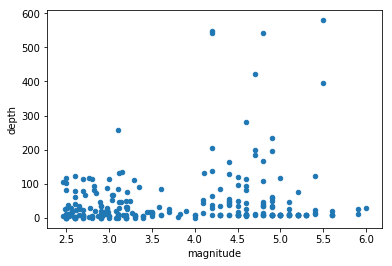

In [11]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [12]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [13]:
# read it back later

new_df = pd.read_csv('usgs_earthquake_data.csv')

print(new_df.head())

   Unnamed: 0  magnitude  depth
0           0       4.90  61.53
1           1       4.50  10.00
2           2       5.20  10.00
3           3       4.40  40.99
4           4       3.08   0.88


# Part 2: Querying an API endpoint

### Mapbox Geocoding API

Services like Google Maps and Mapbox have various APIs that let you access its services through code instead of through GUI apps. This one from Mapbox lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://www.mapbox.com/api-documentation/#geocoding

**API endpoint:**  
https://api.mapbox.com/geocoding/v5/mapbox.places

**API endpoint with query parameters:**  
https://api.mapbox.com/geocoding/v5/mapbox.places/Wurster+Hall.json?access_token=pk.eyJ1IjoiY3AyNTVkZW1vIiwiYSI6ImRPcTlnTUEifQ.3C0d0Nk_rcwV-8JF29PU-w

You can get your own access key by signing up for a Mapbox account, if you'd like. Here is a link for that (but don't do it now): https://www.mapbox.com/signin/?route-to=%22/account/access-tokens%22

In [14]:
import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter()

In [15]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://api.mapbox.com/geocoding/v5/mapbox.places/'

address = 'Wurster Hall'

params = {'limit': 1,
          'access_token': 'pk.eyJ1IjoiY3AyNTVkZW1vIiwiYSI6ImRPcTlnTUEifQ.3C0d0Nk_rcwV-8JF29PU-w'}

url = requests.Request('GET', endpoint+address+'.json', params=params).prepare().url
print(url)

https://api.mapbox.com/geocoding/v5/mapbox.places/Wurster%20Hall.json?limit=1&access_token=pk.eyJ1IjoiY3AyNTVkZW1vIiwiYSI6ImRPcTlnTUEifQ.3C0d0Nk_rcwV-8JF29PU-w


In [16]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'type': 'FeatureCollection', 'query': ['wurster', 'hall'], 'features': [{'id': 'poi.1359351', 'type': 'Feature', 'place_type': ['poi'], 'relevance': 1, 'properties': {'tel': '(510) 642-0831', 'address': '230 Wurster Hall #1820', 'category': 'college, university', 'landmark': True, 'maki': 'college'}, 'text': 'Wurster Hall / College of Environmental Design', 'place_name': 'Wurster Hall / College of Environmental Design, 230 Wurster Hall #1820, Berkeley, California 94720, United States', 'center': [-122.25488, 37.87082], 'geometry': {'type': 'Point', 'coordinates': [-122.25488, 37.87082]}, 'context': [{'id': 'postcode.1038777018848930', 'text': '94720'}, {'id': 'place.4062647275990170', 'wikidata': 'Q484678', 'text': 'Berkeley'}, {'id': 'region.3591', 'short_code': 'US-CA', 'wikidata': 'Q99', 'text': 'California'}, {'id': 'country.3145', 'short_code': 'us', 'wikidata': 'Q30', 'text': 'United States'}]}], 'attribution': 'NOTICE: © 2018 Mapbox and its suppliers. All rights reserved. Use o

In [17]:
# print it more nicely

pp.pprint(data)

{'attribution': 'NOTICE: © 2018 Mapbox and its suppliers. All rights reserved. '
                'Use of this data is subject to the Mapbox Terms of Service '
                '(https://www.mapbox.com/about/maps/). This response and the '
                'information it contains may not be retained.',
 'features': [{'center': [-122.25488, 37.87082],
               'context': [{'id': 'postcode.1038777018848930', 'text': '94720'},
                           {'id': 'place.4062647275990170',
                            'text': 'Berkeley',
                            'wikidata': 'Q484678'},
                           {'id': 'region.3591',
                            'short_code': 'US-CA',
                            'text': 'California',
                            'wikidata': 'Q99'},
                           {'id': 'country.3145',
                            'short_code': 'us',
                            'text': 'United States',
                            'wikidata': 'Q30'}],
          

In [18]:
# pull out the lat-lon coordinates

for r in data['features']:
    coords = r['geometry']['coordinates']
    print(coords)

[-122.25488, 37.87082]


### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://www.mapbox.com/api-documentation/#geocoding). Can you figure out how to retrieve other points of interest near Wurster Hall?

# Part 3: Querying an API with back-and-forth authentication

### Twitter search APIs

Twitter's APIs operate over the web as well, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
http://geduldig.github.io/TwitterAPI/

In [20]:
!pip install TwitterAPI

    100% |████████████████████████████████| 122kB 1.5MB/s ta 0:00:01
  Running setup.py bdist_wheel for TwitterAPI ... done
  Stored in directory: /Users/paul/Library/Caches/pip/wheels/40/a8/ac/9fb7b597a617ef4b805da76d8da4e4ef5b4ffd9a3bc5bef666
Successfully built TwitterAPI
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [21]:
from TwitterAPI import TwitterAPI

import pprint
pp = pprint.PrettyPrinter()

In [22]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [23]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [24]:
# most recent tweet from CED

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'wursterlife', 
    'count': 1
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

Visit Wurster Hall tonight at 6:30pm for Jack Halberstam’s @ArcusLGBT and @PlacesJournal lecture on the work of Ame… https://t.co/wt1m63dTw7


In [25]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Oct 03 15:39:27 +0000 2018',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [{'display_url': 'twitter.com/i/web/status/1…',
                        'expanded_url': 'https://twitter.com/i/web/status/1047511456344813568',
                        'indices': [117, 140],
                        'url': 'https://t.co/wt1m63dTw7'}],
              'user_mentions': [{'id': 427461095,
                                 'id_str': '427461095',
                                 'indices': [59, 69],
                                 'name': 'Arcus Foundation',
                                 'screen_name': 'ArcusLGBT'},
                                {'id': 60747383,
                                 'id_str': '60747383',
                                 'indices': [74, 88],
                                 'name': 'Places Journal',
                                 'screen_name': 'PlacesJournal'}]},
 'favo

### Other API endpoints allow different types of searches

In [26]:
# search for recent tweets with your favorite emoji

endpoint = 'search/tweets'
params = {
    'q': '👻🎃', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @FortniteGame: Shadow Stones have returned! Find one and earn yourself that spooky Victory Royale. 👻🎃

@howloscream: where the lines are just as scary as the houses 👻🌙😋🎃 https://t.co/6MRjByYFS6

RT @dodo: It’s almost that time of year 🎃👻 https://t.co/cXgSNO1qns

RT @loweryykeirra: Happy 8 months pumpkin 🎃👻🧡 #DownSyndromeAwarenessMonth https://t.co/g6dsw4gjqF

RT @moura_aliny: Minha versão helloween 🎃🎃👾👾👻👻 https://t.co/e7GRdB62nr



In [27]:
# search for public tweets in Korean

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'ko', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

그냥 계속 행복이론 들을때마다 자꾸 작붕이론 자동재생돼서 힘들ㄹ음 ㅜ ㅠ

@_111st 흑흑...슬라임카페도 있는데에...가고싶은거에요...

@Jyuke0514 그렇죠! 오늘만 힘내시면 내일이라는 쉬는날이 다가와요!

RT @_at_first_light: 이렇게 생겼다구요.. https://t.co/1QMiz3UJ2e

RT @2kwajik9: 형냐 화내는거야? 왤케 례민해 ㅡㅡㅋ? 남성스럽고 조신하게 쉿! 해야지 ㅎㅎ 나쁜말 쓰면 어엿한 CD가 될수없는쀼젤이잔니 ㅋ https://t.co/YGNYsfFJjv



In [28]:
# search for public tweets geotagged near the UC Berkeley campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '37.873,-122.260,0.5km', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

Two years ago. Never forget. Miss y’all 😘 bornsmusic connortdoyle @kaygeepee magictylr @mistyboyce jonzott… https://t.co/zhX4C5z64q

https://t.co/axdyvwQ5Gr

https://t.co/X9TTcpZoBG

Dude, @Interpol was phenomenal last night. https://t.co/pg1uu1KaDk



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

### Bonus: Streaming live tweets in real time 

In [29]:
# Twitter allows only one or two simultaneous streaming connections for 
# each set of API credentials, so this part may not work during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Mon Oct 08 00:29:10 +0000 2018
Oxford, CT, United States
@GeorgeByrneJr @brianstelter @ashleyfeinberg Tut tut. This is the news that matters.

Mon Oct 08 00:29:10 +0000 2018
Cleveland, OH, United States
Everyday Chronicles 🤣 https://t.co/HlEayhzHWn

Mon Oct 08 00:29:10 +0000 2018
La Florida, Chile, Chile
Porbla puta madre, Tapia ql!!!  #VamosColoColo

Mon Oct 08 00:29:11 +0000 2018
Apodaca, Nuevo León, México
😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂🤣🤣🤣🤣🤣🤣🤣🤣😂😂😂😂😂😂😂😂😂😂😂

Mon Oct 08 00:29:10 +0000 2018
Queens, NY, United States
@CoryBooker https://t.co/AYda0EYFIs

Mon Oct 08 00:29:11 +0000 2018
São Paulo, Brasil, Brasil
O pior de tudo é ver o quanto de deputado/senador foi eleito (surpreendentemente) depois que apoiou o Bonossauro ou… https://t.co/0MShLOJKLU

Mon Oct 08 00:29:11 +0000 2018
Rio de Janeiro, Brasil, Brasil
acabei com 3

Mon Oct 08 00:29:10 +0000 2018
مصر, مصر
منور الدنيا كلها يا هضبتي ياااحلي حاجه في حياتي https://t.co/KVSZpSbNXU

Mon Oct 08 00:29:11 +0000 2018
Montenegro, Brasil, Brasil
Parabéns, 

### Exercises for the remainder of class

Choose your favorite:

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. The earthquakes API is actually returning a specific data format called [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON), also used by many other geospatial data feeds. Try saving the raw GeoJSON file and opening it in QGIS or in the [geojson.io](http://geojson.io) web viewer.  
   &nbsp;

2. Using the geocoding example as a starting point, try searching Mapbox's Directions API or Isochrone (travel time contours) API instead. You can read more about them on the [Mapbox API documentation page](https://www.mapbox.com/api-documentation/#introduction).  
    &nbsp;

3. Try out another API that you're interested in. Can you figure out how to connect to it using Python?  

   With municipal data it's often easiest to just download a data file, but APIs are great for querying big data sets or tracking live updates. Here are some resources.

   - San Francisco:  https://data.sfgov.org/developers  
   - Alameda County:  https://data.acgov.org/developers  
   - UC Berkeley:  https://api-central.berkeley.edu  
   - US Census:  http://www.census.gov/data/developers/data-sets.html  
   - Open Data Network:  https://www.opendatanetwork.com  
   - CivicData:  http://www.civicdata.io/  